# Daily Challenge: Complete Exploratory Data Analysis

## Instructions
Download and import the Data Science Job Salary dataset.
Identify and differentiate between structured and unstructured data within the dataset, and discuss how this impacts your analysis approach.
Preprocess the data by handling missing values and removing duplicates if needed.
Perform a group-wise analysis of the experience_level column, calculating the mean and median salaries for each group using Pandas’ .groupby.
Utilize Pandas’ integration with Matplotlib to create a bar chart visualizing the average salaries for each experience level. Ensure the chart includes appropriate labels, a title, and a color scheme that enhances readability.

In [1]:
# import libraries
import pandas as pd
import matplotlib.pyplot as plt
#import seaborn as sns

In [6]:
job_salary = pd.read_csv('datascience_salaries.csv')

print(job_salary.info())
job_salary.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1171 entries, 0 to 1170
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Unnamed: 0        1171 non-null   int64 
 1   job_title         1171 non-null   object
 2   job_type          1171 non-null   object
 3   experience_level  1171 non-null   object
 4   location          1171 non-null   object
 5   salary_currency   1171 non-null   object
 6   salary            1171 non-null   int64 
dtypes: int64(2), object(5)
memory usage: 64.2+ KB
None


,Unnamed: 0,job_title,job_type,experience_level,location,salary_currency,salary
0,0,Data scientist,Full Time,Senior,New York City,USD,149000
1,2,Data scientist,Full Time,Senior,Boston,USD,120000
2,3,Data scientist,Full Time,Senior,London,USD,68000
3,4,Data scientist,Full Time,Senior,Boston,USD,120000
4,5,Data scientist,Full Time,Senior,New York City,USD,149000
5,6,Data scientist,Full Time,Senior,London,USD,68000
6,7,Data scientist,Full Time,Senior,Research Triangle Park,USD,69000
7,8,Data scientist,Full Time,Senior,Sydney,USD,68000
8,9,Data scientist,Full Time,Senior,San Francisco,USD,140000
9,10,Data scientist,Full Time,Senior,Sofia,USD,68000


<div style="border:solid green 2px; padding: 20px">
    This dataset appears to contain structured data, as the information is organized into columns with well-defined categories such as "job_title," "job_type," "experience_level," "location," "salary_currency," and "salary." Structured data is typically organized into rows and columns, where each column represents a specific attribute or feature, and each row represents an individual record or observation.

Structured data is well-suited for traditional tabular representations and can be easily analyzed using statistical and machine learning techniques. It allows for straightforward querying, filtering, and aggregating operations. The structured nature of the data facilitates the use of standard analytical tools and databases.

On the other hand, unstructured data refers to data that does not have a predefined data model or is not organized in a tabular form. Examples of unstructured data include text, images, audio, and video.
    
The impact of having structured data in your dataset includes:

Ease of Analysis: Structured data is easier to analyze using traditional statistical and analytical methods. You can easily perform aggregations, filtering, and sorting operations.

Compatibility with Tools: Structured data is compatible with a wide range of data analysis tools, including spreadsheets, relational databases, and statistical software.

Querying and Reporting: Structured data facilitates straightforward querying and reporting. You can use SQL queries or Pandas operations to extract specific information from the dataset.

If there were unstructured data within the dataset, such as free-form text comments or resumes, your analysis approach might need to incorporate natural language processing (NLP) techniques or image/audio processing methods, depending on the type of unstructured data. Advanced tools and techniques, such as text mining or sentiment analysis, would be required to derive insights from unstructured information.

In [3]:
print(job_salary['job_title'].value_counts())
print('-----')
print(job_salary['job_type'].value_counts())
print('-----')
print(job_salary['experience_level'].value_counts())
print('-----')
print(job_salary['salary_currency'].value_counts())

Data scientist      394
Data analyst        368
Machine learning    289
Big data            101
ML Ops               19
Name: job_title, dtype: int64
-----
Full Time     1136
Internship      35
Name: job_type, dtype: int64
-----
Senior       727
Mid          305
Entry        126
Executive     13
Name: experience_level, dtype: int64
-----
USD    1157
EUR       9
GBP       5
Name: salary_currency, dtype: int64


In [4]:
# checking for duplicate strings
job_salary.duplicated().sum()

0

<div style="border:solid green 2px; padding: 20px">

- The dataset contains 7 columns and 1171 rows. 
- There are no missing values or duplicates in the dataset.
- The dataset has an "Unnamed" column that duplicates the indexes, however, there are missing numbers. Since we do not know what these numbers mean, and they are not needed for further analysis, this column can be deleted.
- There are 35 "Internship" rows in the job_type column. Since only full-time employees are needed for the analysis, these 35 rows can be deleted.
- In the salary_currency column, most of the rows are USD. However, there are 9 rows with the EUR currency and 5 lines with the GBP currency. Since we do not know when the dataset was created, we cannot know what the exchange rate was at that time in order to bring all lines to USD. Therefore, 14 lines with other currencies can be deleted.

In [7]:
# Removing unnecessary Unnamed: 0 column
job_salary.drop(columns=['Unnamed: 0'], inplace=True)

,job_title,job_type,experience_level,location,salary_currency,salary
0,Data scientist,Full Time,Senior,New York City,USD,149000
1,Data scientist,Full Time,Senior,Boston,USD,120000
2,Data scientist,Full Time,Senior,London,USD,68000
3,Data scientist,Full Time,Senior,Boston,USD,120000
4,Data scientist,Full Time,Senior,New York City,USD,149000


In [8]:
# Deleting lines with the currency EUR and GBP, and the job type of Internship
filtered_job_salary = job_salary.query('salary_currency not in ["EUR", "GBP"] and job_type != "Internship"')
len(filtered_job_salary)

1122

### Perform a group-wise analysis of the experience_level column, calculating the mean and median salaries for each group using Pandas’ .groupby

In [10]:
filtered_job_salary['salary'].describe()

count      1122.000000
mean      65360.071301
std       32951.083297
min       30000.000000
25%       45000.000000
50%       63000.000000
75%       68000.000000
max      228000.000000
Name: salary, dtype: float64

In [12]:
# Group-wise analysis
experience_level_salary = filtered_job_salary.groupby('experience_level')['salary'].agg(['mean', 'median']).round(2)
experience_level_salary

,mean,median
experience_level,,
Entry,35678.57,30000.0
Executive,76076.92,46000.0
Mid,51512.03,51000.0
Senior,75579.32,68000.0


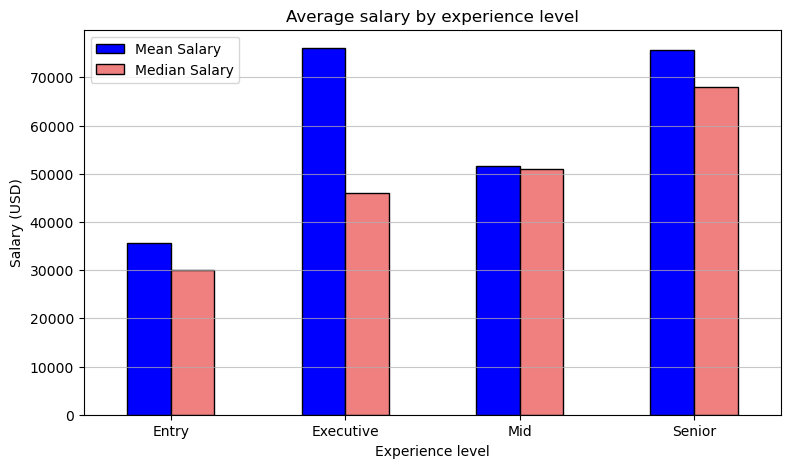

In [16]:
# Plotting the bar chart
fig, ax = plt.subplots(figsize=(9, 5))
experience_level_salary.plot(kind='bar', ax=ax, color=['blue', 'lightcoral'], edgecolor='black')

ax.set_xlabel('Experience level')
ax.set_ylabel('Salary (USD)')
ax.set_title('Average salary by experience level')
ax.legend(['Mean Salary', 'Median Salary'])
plt.xticks(rotation=0)
ax.grid(axis='y', alpha=0.7)

plt.show()

<div style="border:solid green 2px; padding: 20px">
    The mean value is influenced by outliers (for example, a very large salary), so sometimes the mean value is very different from the median.
    
    For specialists with the experience level "Mid", the mean and median are almost the same, which indicates the homogeneity of this group. The mean and median of the "Executive" are the most different.